In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [6]:
DataFrame = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectIMDB/data/movie_metadata.csv")
DataFrame = DataFrame.dropna()
DataFrame.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


# Analisis de los datos

In [7]:
print(DataFrame.columns)
df = DataFrame

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


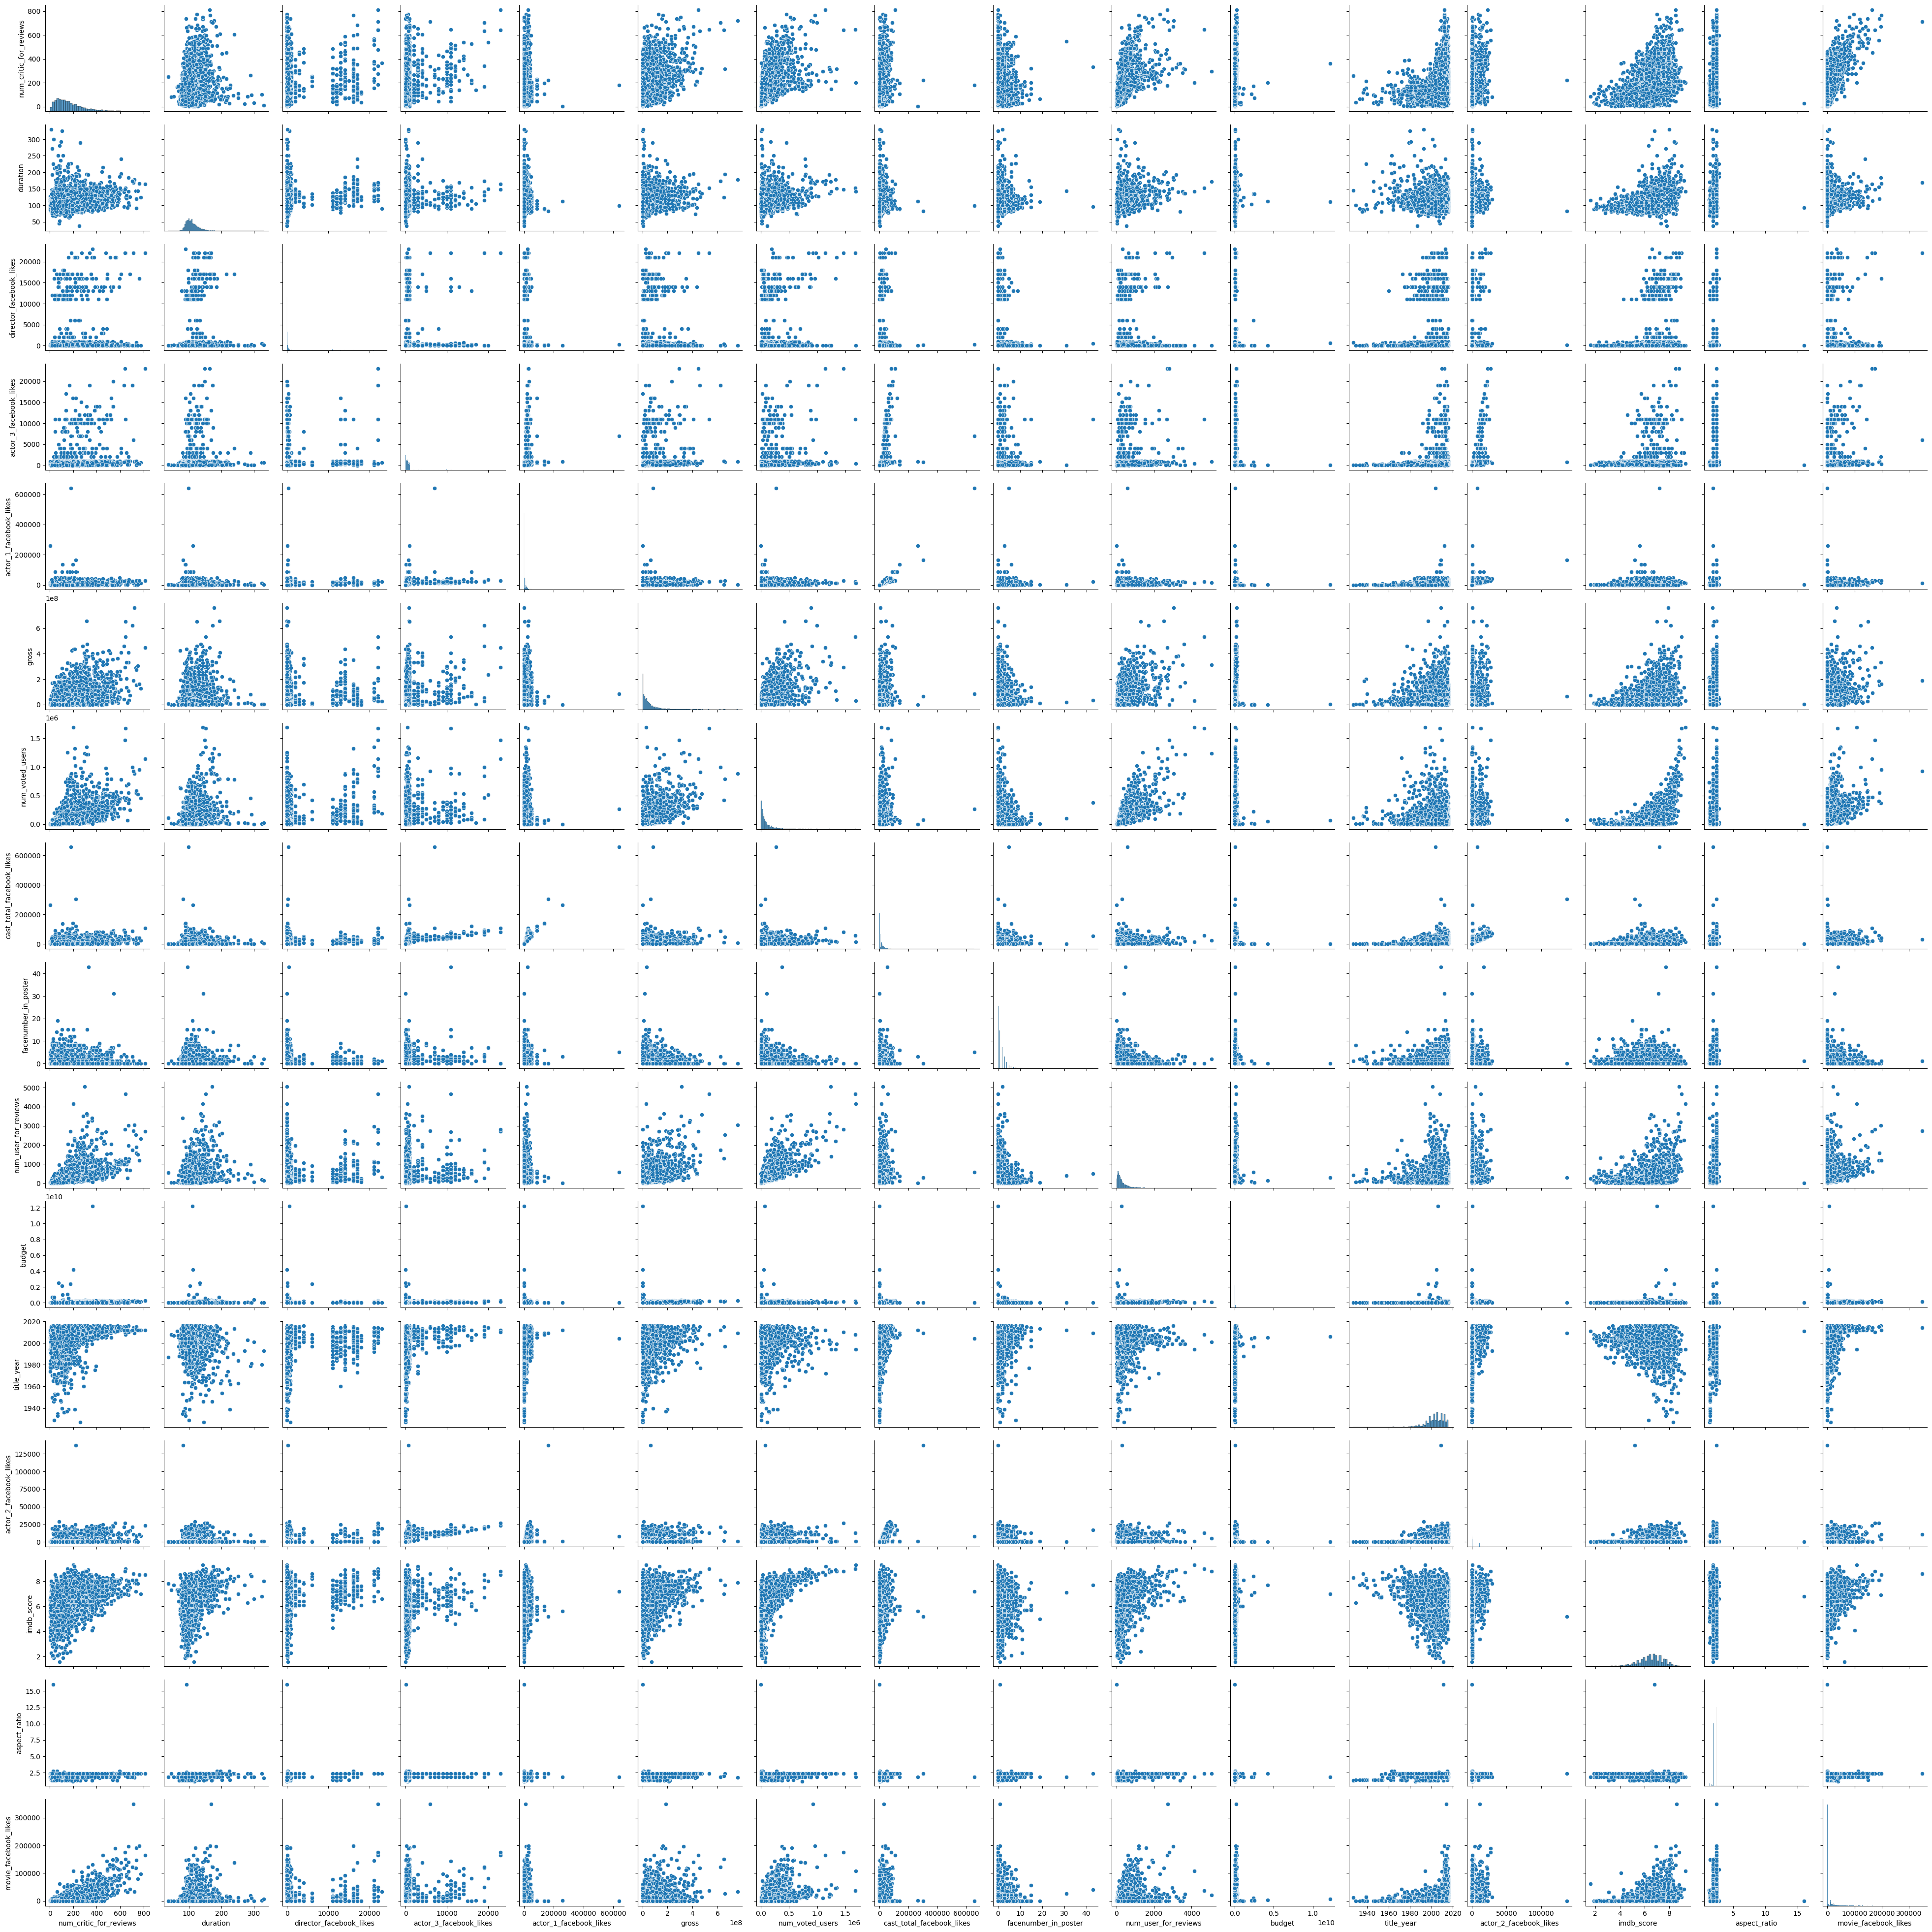

In [4]:
sns.pairplot(data = df)

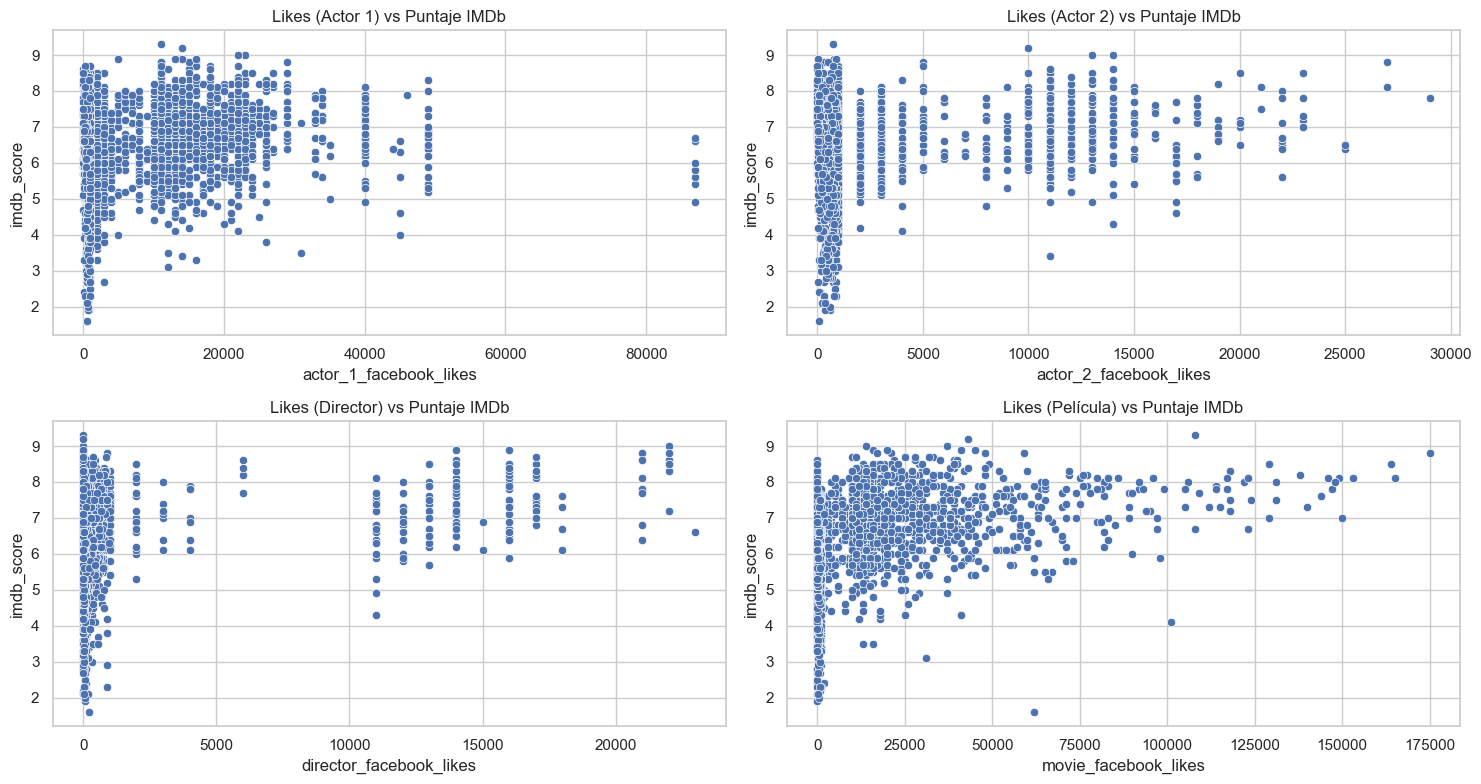

In [42]:
# Configuración para mejorar la apariencia de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

df_filtered_actor_1_likes = df[(df['actor_1_facebook_likes'] >= 0) & (df['actor_1_facebook_likes'] <= 125000)]
# Gráfico de dispersión de Likes en Facebook (Actor 1) vs Puntaje IMDb
plt.subplot(2, 2, 1)
sns.scatterplot(x='actor_1_facebook_likes', y='imdb_score', data=df_filtered_actor_1_likes)
plt.title('Likes (Actor 1) vs Puntaje IMDb')

df_filtered_actor_2_likes = df[(df['actor_2_facebook_likes'] >= 0) & (df['actor_2_facebook_likes'] <= 60000)]
# Gráfico de dispersión de Movie Likes vs Puntaje IMDb
plt.subplot(2, 2, 2)
sns.scatterplot(x='actor_2_facebook_likes', y='imdb_score', data=df_filtered_actor_2_likes)
plt.title('Likes (Actor 2) vs Puntaje IMDb')

# Gráfico de dispersión de Likes en Facebook (Director) vs Puntaje IMDb
plt.subplot(2, 2, 3)
sns.scatterplot(x='director_facebook_likes', y='imdb_score', data=df)
plt.title('Likes (Director) vs Puntaje IMDb')


plt.subplot(2, 2, 4)
df_filtered_movies_lies = df[(df['movie_facebook_likes'] >= 0) & (df['movie_facebook_likes'] <= 175000)]
# Gráfico de dispersión de Movie Likes vs Puntaje IMDb
sns.scatterplot(x='movie_facebook_likes', y='imdb_score', data=df_filtered_movies_lies)
plt.title('Likes (Película) vs Puntaje IMDb')


# Ajustes de diseño
plt.tight_layout()
plt.show()

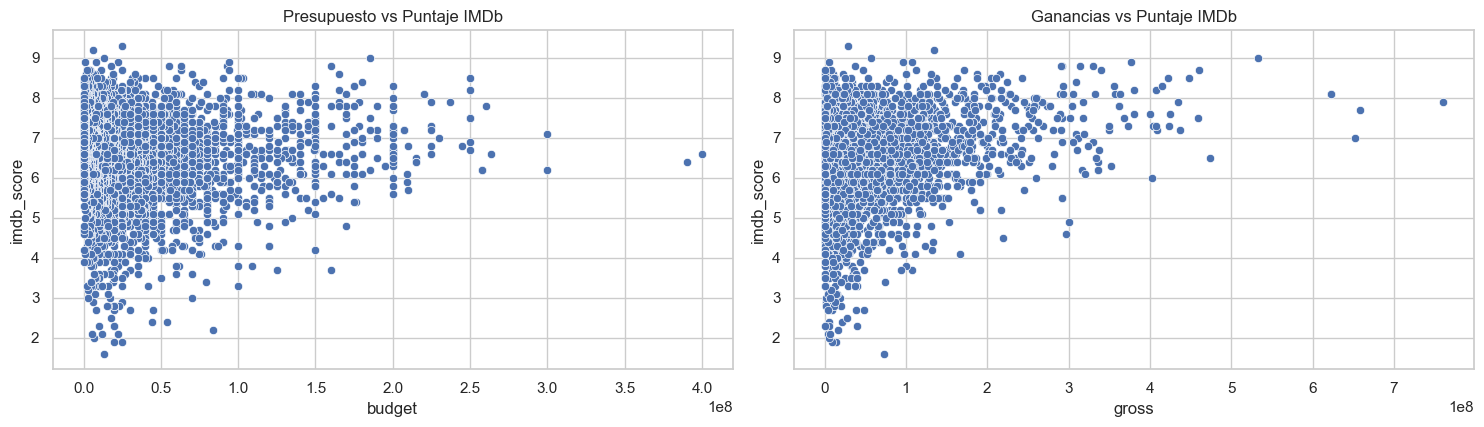

In [36]:

# Configuración para mejorar la apariencia del gráfico de dispersión
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

df_filtered_budget = df[(df['budget'] >= 0) & (df['budget'] <= 400000000)]
# Gráfico de dispersión de Presupuesto vs Puntaje IMDb
plt.subplot(2, 2, 1)
sns.scatterplot(x='budget', y='imdb_score', data=df_filtered_budget)
plt.title('Presupuesto vs Puntaje IMDb')


plt.subplot(2, 2, 2)
sns.scatterplot(x='gross', y='imdb_score', data=df)
plt.title('Ganancias vs Puntaje IMDb')

plt.tight_layout()
plt.show()

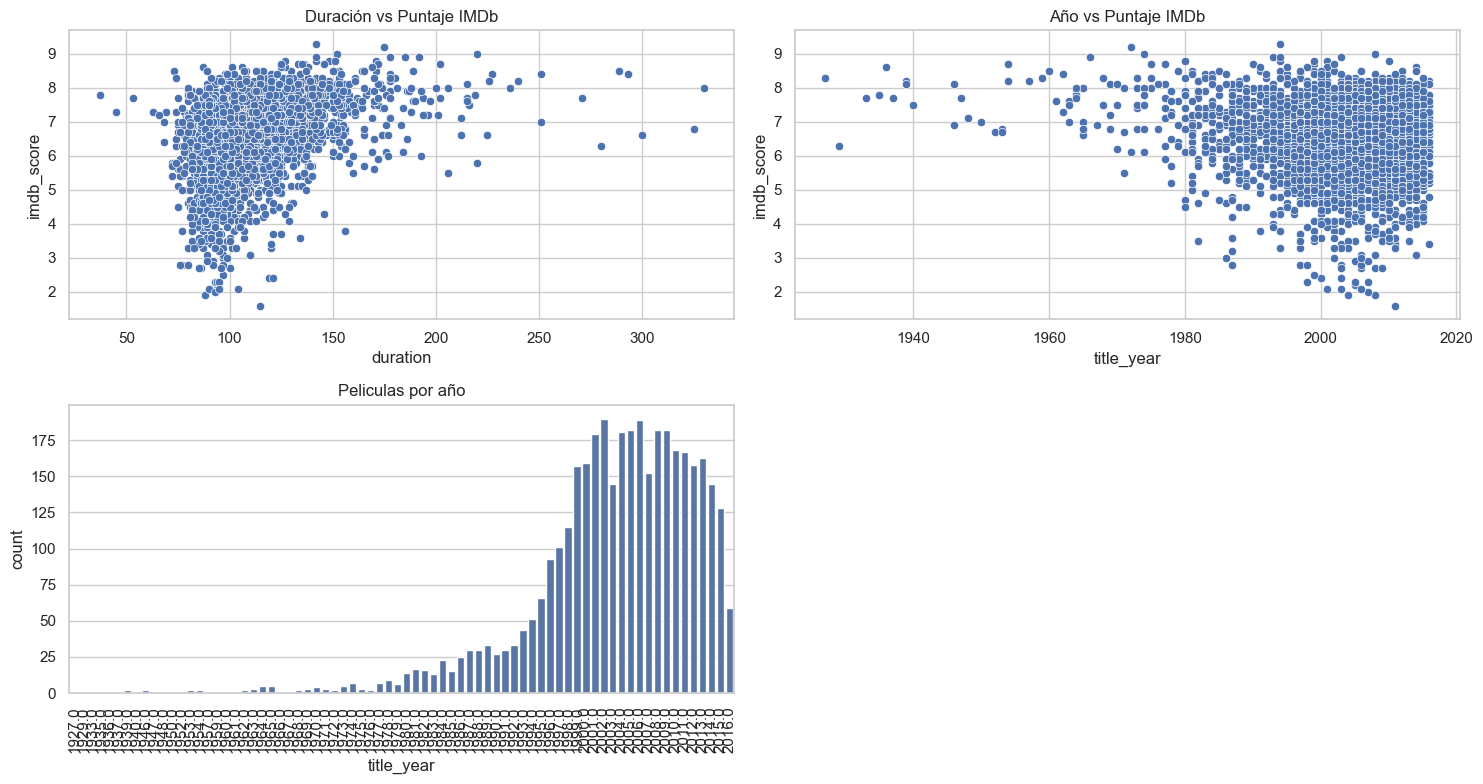

In [57]:
# Configuración para mejorar la apariencia del gráfico de dispersión
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Gráfico de dispersión de Duración vs Puntaje IMDb
plt.subplot(2, 2, 1)
sns.scatterplot(x='duration', y='imdb_score', data=df)
plt.title('Duración vs Puntaje IMDb')

plt.subplot(2, 2, 2)
sns.scatterplot(x='title_year', y='imdb_score', data=df)
plt.title('Año vs Puntaje IMDb')

plt.subplot(2, 2, 3)
sns.countplot(x='title_year', data=df)
plt.xticks(rotation=90)
plt.title('Peliculas por año')

plt.tight_layout()
plt.show()

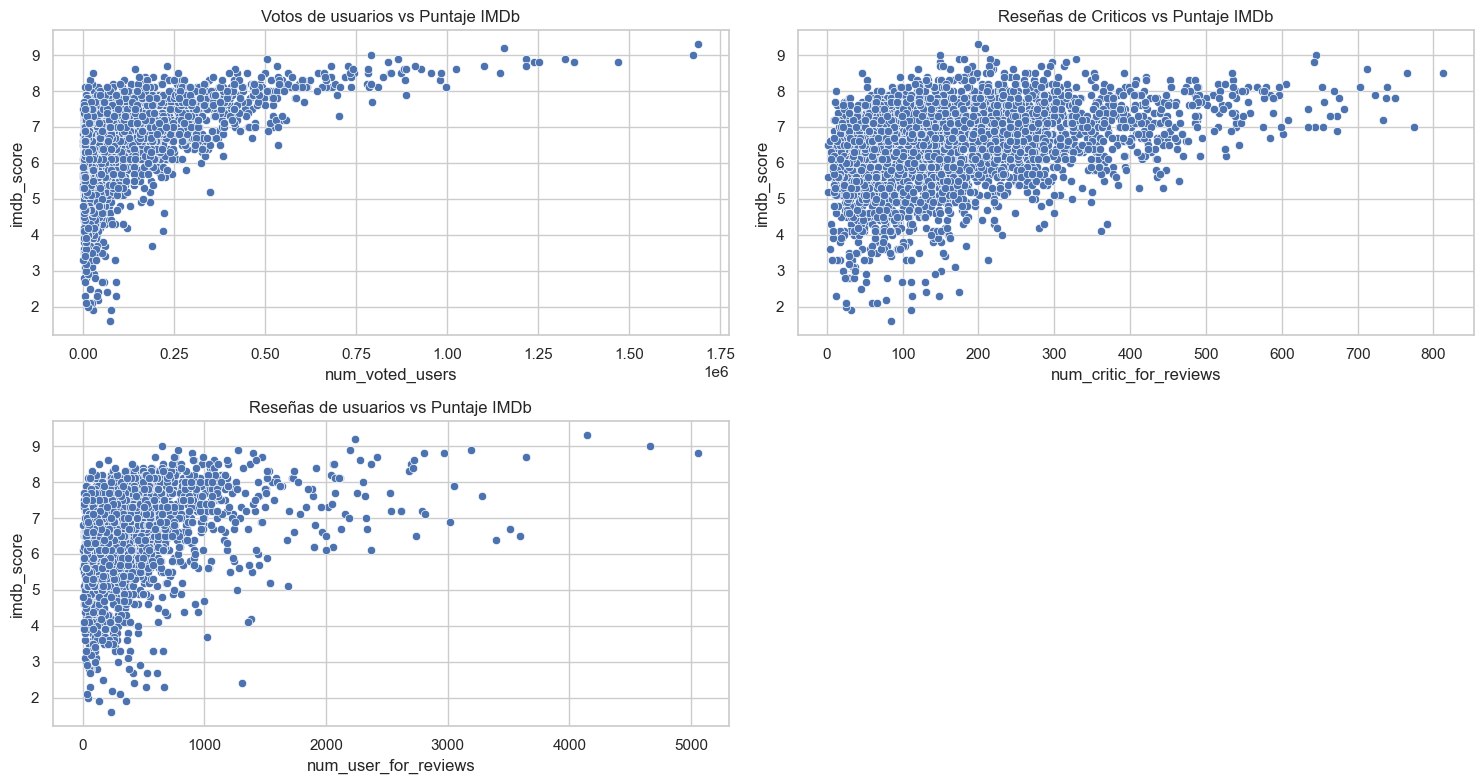

In [52]:
# Configuración para mejorar la apariencia del gráfico de dispersión
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Gráfico de dispersión de Duración vs Puntaje IMDb
plt.subplot(2, 2, 1)
sns.scatterplot(x='num_voted_users', y='imdb_score', data=df)
plt.title('Votos de usuarios vs Puntaje IMDb')

plt.subplot(2, 2, 2)
sns.scatterplot(x='num_critic_for_reviews', y='imdb_score', data=df)
plt.title('Reseñas de Criticos vs Puntaje IMDb')

plt.subplot(2, 2, 3)
sns.scatterplot(x='num_user_for_reviews', y='imdb_score', data=df)
plt.title('Reseñas de usuarios vs Puntaje IMDb')

plt.tight_layout()
plt.show()

# Entrenamiento del modelo

In [19]:
# Separamos datos de prueba y entrenamiento
# Creamos una variable "Y" que almacena la columna "target" del DataFrame y "X" que contiene las caracteristicas
Y = df["imdb_score"]
X = df.drop(columns=["imdb_score", "movie_imdb_link", "movie_title", "aspect_ratio", "language", "facenumber_in_poster", "color"])
print(X.dtypes)

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
plot_keywords                 object
num_user_for_reviews         float64
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
movie_facebook_likes           int64
dtype: object


In [20]:
toInt = ["director_name", "actor_2_name", "genres", "actor_1_name", "actor_3_name", "plot_keywords", "country", "content_rating"]
Label_Encoder = LabelEncoder()

for column in toInt:
    X[column] = Label_Encoder.fit_transform(X[column])

In [22]:
columnas = ['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'plot_keywords', 'num_user_for_reviews', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes',
       'movie_facebook_likes']

for column in columnas:
    X[column] = np.log(X[column]+1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

In [24]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [28]:
# Realizamos predicciones en el conjunto de prueba
y_pred = LR.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio:", mse)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R2):", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)

rmse = np.sqrt(mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Error Porcentual Absoluto Medio (MAPE):", mape)

Error Cuadrático Medio: 0.6076776946504097
Coeficiente de Determinación (R2): 0.4272107636235104
Error Absoluto Medio (MAE): 0.5856822988039637
Raíz del Error Cuadrático Medio (RMSE): 0.7795368462429532
Error Porcentual Absoluto Medio (MAPE): 10.187413913312396


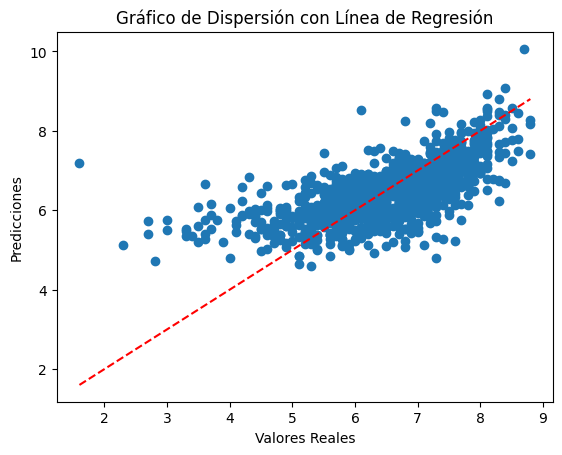

In [29]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión con Línea de Regresión')
plt.show()